**Anh Nguyen**

Fall 2023

CS 251: Data Analysis and Visualization

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.show()
plt.rcParams.update({'font.size': 14})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

# Project 4 | Principal component analysis

Principal component analysis (PCA) is a technique to reduce the dimensionality of a dataset while losing the least amount of information about the data variables. Before implementing PCA and exploring its use with different datasets, you will explore what happens when you manually reduce the dimensionality of a mystery dataset from 3D to 2D.

In [3]:
from data_transformations import normalize, center, rotation_matrix_3d
from scatter3d import scatter3dplot

## Task 1: Dimensionality reduction by hand

### 1a. Load and visualize mystery dataset

Load in the mystery dataset (`mystery.csv`) as a panda DataFrame below. Print out the header and the first five rows of data. You should see:

```
	       x	        y	        z	   color
0	6.183216	86.707892	90.551566	4.810163
1	0.969658	16.972285	137.976605	9.442446
2	0.727076	57.112193	139.795502	9.384942
3	8.433828	30.348513	113.600202	5.973703
4	8.188306	133.978413	120.671505	6.051754
```

**Note:** The `mystery.csv` does not have a types row. Going forward, csv files we work with won't have the types row.

In [4]:
df = pd.read_csv('data/mystery.csv')
print(df.head())

          x           y           z     color
0  6.183216   86.707892   90.551566  4.810163
1  0.969658   16.972285  137.976605  9.442446
2  0.727076   57.112193  139.795502  9.384942
3  8.433828   30.348513  113.600202  5.973703
4  8.188306  133.978413  120.671505  6.051754


Select the x, y, and z variables from the pandas DataFrame and [convert it to a numpy ndarray](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html).

In [5]:
xyz_data = df[['x', 'y', 'z']]
xyz_array = xyz_data.to_numpy()

Use the provided `scatter3dplot` function in `scatter3d.py` to make a 3D scatter plot of the `x`, `y`, and `z` numeric variables. Set the color keyword argument to the `color` variable value from the pandas DataFrame (`len=2000`).

Set the plot bounds (`lims` keyword argument) so that the **entire** dataset appears within the 3D scatter plot. In the provided `scatter3dplot` function, the plot limits that you pass in apply to **all** x, y, and z axes. It may be helpful to print out the min and max of each variable and make sure the bounds that you select encompass all the samples.

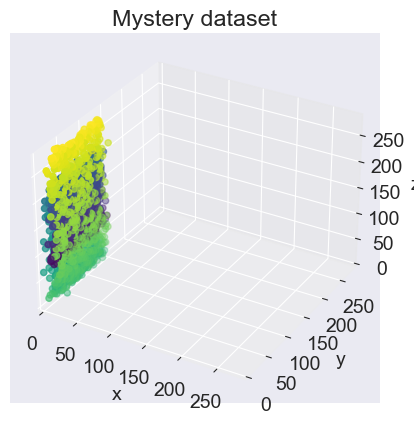

In [6]:
x = df['x']
y = df['y']
z = df['z']
color = df['color']

x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()
z_min, z_max = z.min(), z.max()

lims = (min(x_min, y_min, z_min), max(x_max, y_max, z_max))

scatter3dplot(xyz_array, color=df['color'].values, lims=lims)

### 1b. Preprocess mystery dataset (1/2): Normalize

Implement the `normalize` function in `data_transformations.py` then perform min-max normalization on the `x`, `y`, and `z` values in the mystery dataset.

Use `scatter3dplot` to make a 3D scatterplot of the normalized dataset. Set the color as before, but update the plot limits appropriately based on the new normalized data range.

<!-- In **two lines of code** below, print out the mins and maxes of **each variable** and verify that the data variables are normalized as expected. As above, you should print two length-3 ndarrays — the min and max of each variable (x, y, z) -->

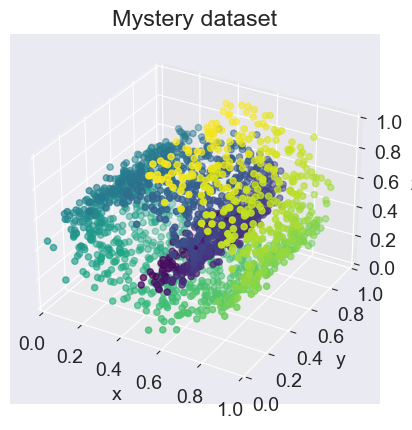

In [7]:
normalized_df = normalize(df)
xyz_ndata = normalized_df[['x', 'y', 'z']]
xyz_narray = xyz_ndata.to_numpy()

xn = normalized_df['x']
yn = normalized_df['y']
zn = normalized_df['z']
color = normalized_df['color']

x_min, x_max = xn.min(), xn.max()
y_min, y_max = yn.min(), yn.max()
z_min, z_max = zn.min(), zn.max()

limsn = (min(x_min, y_min, z_min), max(x_max, y_max, z_max))

scatter3dplot(xyz_narray, color=df['color'].values, lims=limsn)

### 1c. Questions

**Question 1:** What are the min and max values of each variable in the normalized dataset?

**Question 2:** Describe the shape and structure of the normalized mystery dataset. **Why** was the appearance of the dataset not obvious when plotting the raw un-normalized dataset?

**Answer 1:** 0.0 and 1.0

**Answer 2:** It has the shape of a sheet being curled inside. The shape was not obvious because the scale was differnt and the structure was too far away from the view point.

In [8]:
# verifying min-max

print(x_min, x_max, y_min, y_max, z_min, z_max)


0.0 1.0 0.0 1.0 0.0 1.0


### 1d. Preprocess mystery dataset (2/2): Center

Implement the `center` function in `data_transformations.py` then center the `x`, `y`, and `z` values in the **normalized** mystery dataset. Then use `scatter3dplot` to make a 3D scatterplot of the normalized and centered dataset. Set the color as before.

Update the plot limits appropriately based on the new expected data range so that all data samples appear in the plot, but minimize "filler space" around the dataset in the plot (*i.e. we want to view the full dataset close-up in detail*).

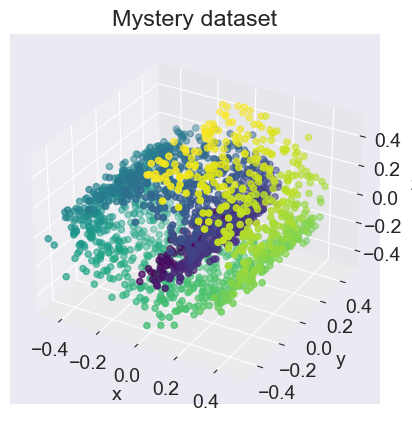

In [9]:
centered_normalized_df = center(normalized_df)
centered_data = centered_normalized_df[['x', 'y', 'z']]
centered_np = centered_data.to_numpy()


x_c =centered_normalized_df['x']
y_c =centered_normalized_df['y']
z_c =centered_normalized_df['z']
color =centered_normalized_df['color']

x_min, x_max = x_c.min(), x_c.max()
y_min, y_max = y_c.min(), y_c.max()
z_min, z_max = z_c.min(), z_c.max()

limsn = (min(x_min, y_min, z_min), max(x_max, y_max, z_max))

scatter3dplot(centered_np, color=df['color'].values, lims=limsn)

### 1e. Questions

**Question 3:** Check to make sure that the normalized mystery dataset is now also centered. **Note:** It is totally fine if you have some `-0.` values.

**Question 4:** What are the min and max values of each variable in the normalized and centered dataset? Briefly describe **why** these new min and max values make sense.

**Answer 3:** The dataset is centered for any practical use, being only to the 10th decimal point larget/smaller than 0

**Answer 4:** Min values:-0.501025466599815 -0.4928558508047669 -0.47661337222124966
Max values: 0.49897453340018505 0.5071441491952331 0.5233866277787503

The range is around -0.5 to 0.5, which makes sense because the mean is around 0, and the range is less than -1 to 1, which is the point of normalization

In [21]:
# Verify centered property
mean_x = x_c.mean()
mean_y = y_c.mean()
mean_z = z_c.mean()

if round(mean_x, 10) == 0 and round(mean_y, 10) == 0 and round(mean_z, 10) == 0:
    print("The normalized mystery dataset is centered.")
else:
    print("The normalized mystery dataset is not centered.")


# Verify min-maxes

print(x_min, y_min, z_min)
print(x_max, y_max, z_max)



The normalized mystery dataset is centered.
-0.501025466599815 -0.4928558508047669 -0.47661337222124966
0.49897453340018505 0.5071441491952331 0.5233866277787503


### 1f. Projecting mystery dataset from 3D to 2D (1/2)

In the cell below, create a 2D scatter plot showing just the `x` and `y` variables in the normalized and centered mystery dataset.

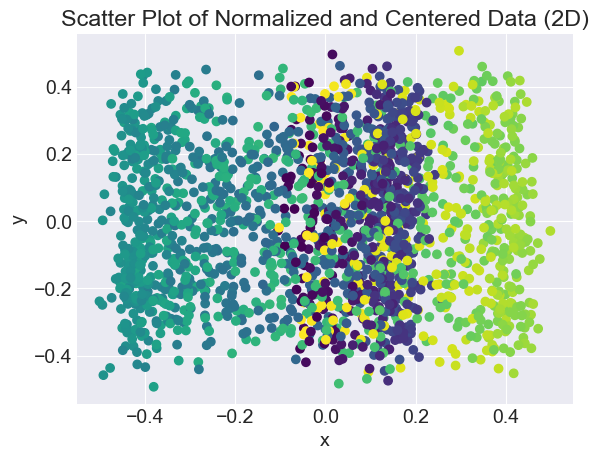

In [11]:
x_values = centered_normalized_df['x']
y_values = centered_normalized_df['y']

plt.scatter(x_values, y_values, c=centered_normalized_df['color'], cmap='viridis')

plt.xlabel('x')
plt.ylabel('y')

plt.title('Scatter Plot of Normalized and Centered Data (2D)')
plt.show()

### 1g. Questions

**Question 5:** Based on your 2D scatter plot, does the projection that you performed in Task 1f look like a "good" way to reduce the dimensionality of the dataset from 3D to 2D? **Why?**


**Answer 5:** I think it is a good way to reduce the dimensionality of the dataset because I could still see the pattern and make out the shape of the dataset.

### 1h. Implement `rotation_matrix_3d`

In `data_transformations.py` implement `rotation_matrix_3d` then test it below.

#### Test `rotation_matrix_3d`

In [12]:
# Test rotate about x axis
print('Your 3D Rotation matrix about x axis by +30° is:')
print(rotation_matrix_3d(30, axis='x'))
print('and should be:')
print('''[[ 1.       0.       0.     ]
 [ 0.       0.86603 -0.5    ]
 [ 0.       0.5      0.86603]]''')

# Test rotate about y axis
print('Your 3D Rotation matrix about y axis by -15° is:')
print(rotation_matrix_3d(-15, axis='y'))
print('and should be:')
print('''[[ 0.96593  0.      -0.25882]
 [ 0.       1.       0.     ]
 [ 0.25882  0.       0.96593]]''')

# Test rotate about z axis
print('Your 3D Rotation matrix about z axis by 45° is:')
print(rotation_matrix_3d(45, axis='z'))
print('and should be:')
print('''[[ 0.70711 -0.70711  0.     ]
 [ 0.70711  0.70711  0.     ]
 [ 0.       0.       1.     ]]''')

Your 3D Rotation matrix about x axis by +30° is:
[[ 1.       0.       0.     ]
 [ 0.       0.86603 -0.5    ]
 [ 0.       0.5      0.86603]]
and should be:
[[ 1.       0.       0.     ]
 [ 0.       0.86603 -0.5    ]
 [ 0.       0.5      0.86603]]
Your 3D Rotation matrix about y axis by -15° is:
[[ 0.96593  0.      -0.25882]
 [ 0.       1.       0.     ]
 [ 0.25882  0.       0.96593]]
and should be:
[[ 0.96593  0.      -0.25882]
 [ 0.       1.       0.     ]
 [ 0.25882  0.       0.96593]]
Your 3D Rotation matrix about z axis by 45° is:
[[ 0.70711 -0.70711  0.     ]
 [ 0.70711  0.70711  0.     ]
 [ 0.       0.       1.     ]]
and should be:
[[ 0.70711 -0.70711  0.     ]
 [ 0.70711  0.70711  0.     ]
 [ 0.       0.       1.     ]]


### 1i. Projecting mystery dataset from 3D to 2D (2/2)

Reduce the dimensionality of the **normalized and centered** mystery dataset from 3D -> 2D while doing a better job at preserving the "rolled" shape than in Task 1f. Do this below by projecting the 3D dataset into the (`x`, `y`) plane just like you did in Task 1f (i.e. make a 2D scatter plot of `x` and `y`), but this time rotate the 3D normalized and centered mystery dataset **beforehand**. The amount of 3D rotation and the axis about which it is performed is up to you.

Your goal is to rotate the 3D dataset so that the "rolled" spiral structure (*i.e. the key shape of the dataset*) comes into view of the `x`-`y` plane/axis when you project the dataset down into 2D via your 2D scatter plot.

The cell below should show a 2D scatter plot with the spiral/rolled structure clearly visible.

**Note:** It should be helpful to plot the normalized and centered mystery dataset in 3D with `scatter3dplot` before and after the rotation.

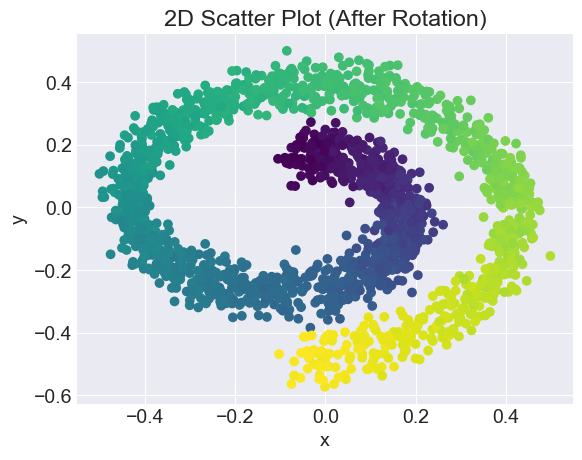

In [13]:
rotation_matrix = rotation_matrix_3d(100, axis='x')
xyz_rot = centered_normalized_df[['x', 'y', 'z']].dot(rotation_matrix.T)
xyz_rot = xyz_rot.to_numpy()
plt.figure()
plt.scatter(xyz_rot[:, 0], xyz_rot[:, 1], c=centered_normalized_df['color'], cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Scatter Plot (After Rotation)')
plt.show()

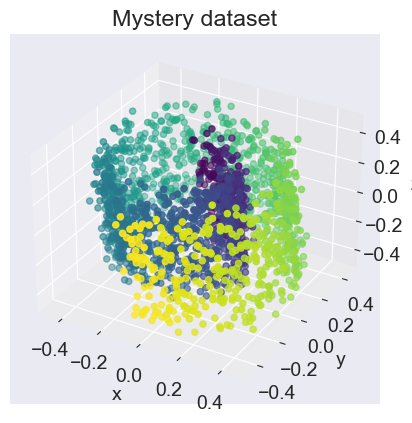

In [14]:
scatter3dplot(xyz_rot, color=df['color'], lims=(-0.5, 0.5))